In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
duration=3
sampling_rate=1024

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# DC - No Frequency
amp_dc = -3
phase_angle_dc = np.radians(180)
dc_real = np.full_like(t, amp_dc * np.cos(phase_angle_dc))
dc_phasor = amp_dc * np.exp(1j * phase_angle_dc)


# 30pi component
amp_30pi = -4
angular_freq_30pi = 30 * np.pi
phase_angle_30pi = np.radians(90)
phase_30pi = angular_freq_30pi * t + phase_angle_30pi

hz_30pi = angular_freq_30pi / (2 * np.pi)
period_30pi = 1 / hz_30pi

real_30pi = amp_30pi * np.cos(phase_30pi)
phasor_30pi = amp_30pi * np.exp(1j * phase_30pi) # 30pi component as a complex number


#Combine the components
combined = dc_real + real_30pi
combined_phasor = dc_phasor + phasor_30pi

print(f'period_30pi: {period_30pi}')
print(f'hz_30pi: {hz_30pi}')

tolerance = 1e-15  # Define a tolerance for numerical errors
is_close = np.allclose(combined, np.real(combined_phasor), atol=tolerance)
print(f'is_close: {is_close}')

period_30pi: 0.06666666666666668
hz_30pi: 14.999999999999998
is_close: True


Average Power of the Signal: 25.005484928933136


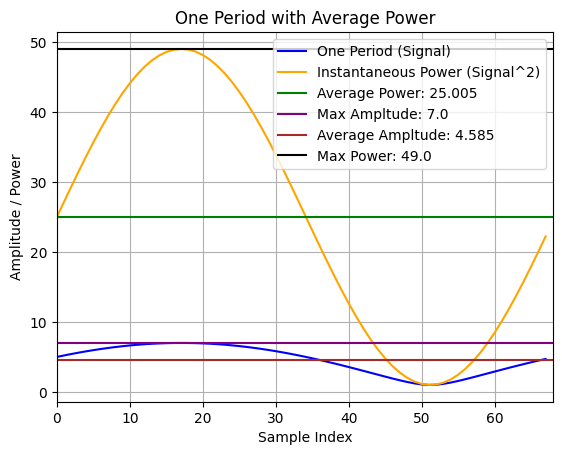

In [9]:
# Find the index for one period
end_index = np.where(t <= period_30pi)[0][-1]

one_period = np.abs((combined_phasor))[0:end_index]
average_ampltude = np.mean(one_period)
max_amplitude = np.max(one_period)

power = one_period**2
average_power = np.mean(power)
max_power = np.max(power)


print(f"Average Power of the Signal: {average_power}")

plt.figure()
plt.title('One Period with Average Power')
plt.plot(one_period, label='One Period (Signal)', color='blue')
plt.plot(power, label='Instantaneous Power (Signal^2)', color='orange')
plt.axhline(average_power, linestyle='-', color='green', label=f'Average Power: {round(average_power, 3)}')
plt.axhline(max_amplitude, linestyle='-', color='purple', label=f'Max Ampltude: {round(max_amplitude, 3)}')
plt.axhline(average_ampltude, linestyle='-', color='brown', label=f'Average Ampltude: {round(average_ampltude, 3)}')
plt.axhline(max_power, linestyle='-', color='black', label=f'Max Power: {round(max_power, 3)}')
plt.xlabel("Sample Index")
plt.ylabel("Amplitude / Power")
plt.xlim(0, len(one_period))
plt.legend()
plt.grid(True)
plt.show()


Average Power of the Signal: 25.0


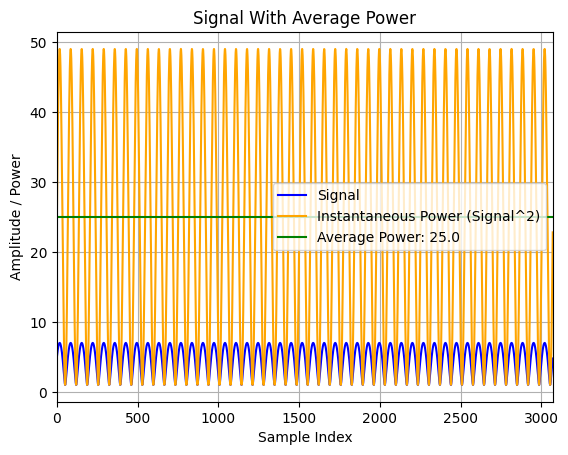

In [10]:
signal_amplitude = np.abs(combined_phasor)
signal_power = signal_amplitude**2
average_power = np.mean(signal_power)

print(f"Average Power of the Signal: {average_power}")

plt.figure()
plt.title('Signal With Average Power')
plt.plot(signal_amplitude, label='Signal', color='blue')
plt.plot(signal_power, label='Instantaneous Power (Signal^2)', color='orange')
plt.axhline(average_power, linestyle='-', color='green', label=f'Average Power: {round(average_power, 3)}')
plt.xlabel("Sample Index")
plt.ylabel("Amplitude / Power")
plt.xlim(0, len(signal_amplitude))
plt.legend()
plt.grid(True)
plt.show()